# Colorize Input Space According to Outputs

<hr/>

#### Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

from ensemble_uncertainties.executable import load_data

from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### Constants

In [2]:
DATA_FOLDER = '../../../data/featurized/'
PLOT_FOLDER = './plots/'

#### Settings

In [3]:
mpl.rcParams['figure.dpi'] = 200

#### Functions

In [4]:
def scale(X):
    """Applies the StandardScaler."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled


def custom_pca(X):
    """Performs PCA."""
    X_scaled = scale(X)
    pca = PCA()
    components = pca.fit_transform(X_scaled)
    dim1, dim2 = components.T[0], components.T[1]
    return dim1, dim2


def custom_kernel_pca(X):
    """Performs kernel PCA."""
    X_scaled = scale(X)
    transformer = KernelPCA(n_components=2, kernel='rbf')
    kernel_components = transformer.fit_transform(X_scaled)
    dim1, dim2 = kernel_components.T[0], kernel_components.T[1]
    return dim1, dim2


def custom_tsne(X):
    """Performs t-SNE."""
    X_scaled = scale(X)
    X_embedded = TSNE(n_components=2, init='random', n_iter=1000).fit_transform(X_scaled)
    dim1, dim2 = X_embedded.T
    return dim1, dim2


def color_dataset(dataset_name, featurization, ax, reduction=custom_pca, text='a', text_loc=[0, 0], xlim=None, ylim=None, axlabels=None):
    """Colors a dataset according y after a dimensionality reduction of choice."""
    X_path = f'{DATA_FOLDER}{dataset_name}/{dataset_name}_{featurization}.csv'
    y_path = f'{DATA_FOLDER}{dataset_name}/{dataset_name}_y.csv'
    X, y = load_data(X_path, y_path)
    dim1, dim2 = reduction(X)
    ax.grid(zorder=1000)
    ax.scatter(dim1, dim2, c=y['y'], zorder=100, s=5)
    ax.text(text_loc[0], text_loc[1], text, fontsize=20, weight='bold')
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if axlabels:
        ax.set_xlabel(axlabels[0])
        ax.set_ylabel(axlabels[1])

<hr/>

#### Plot

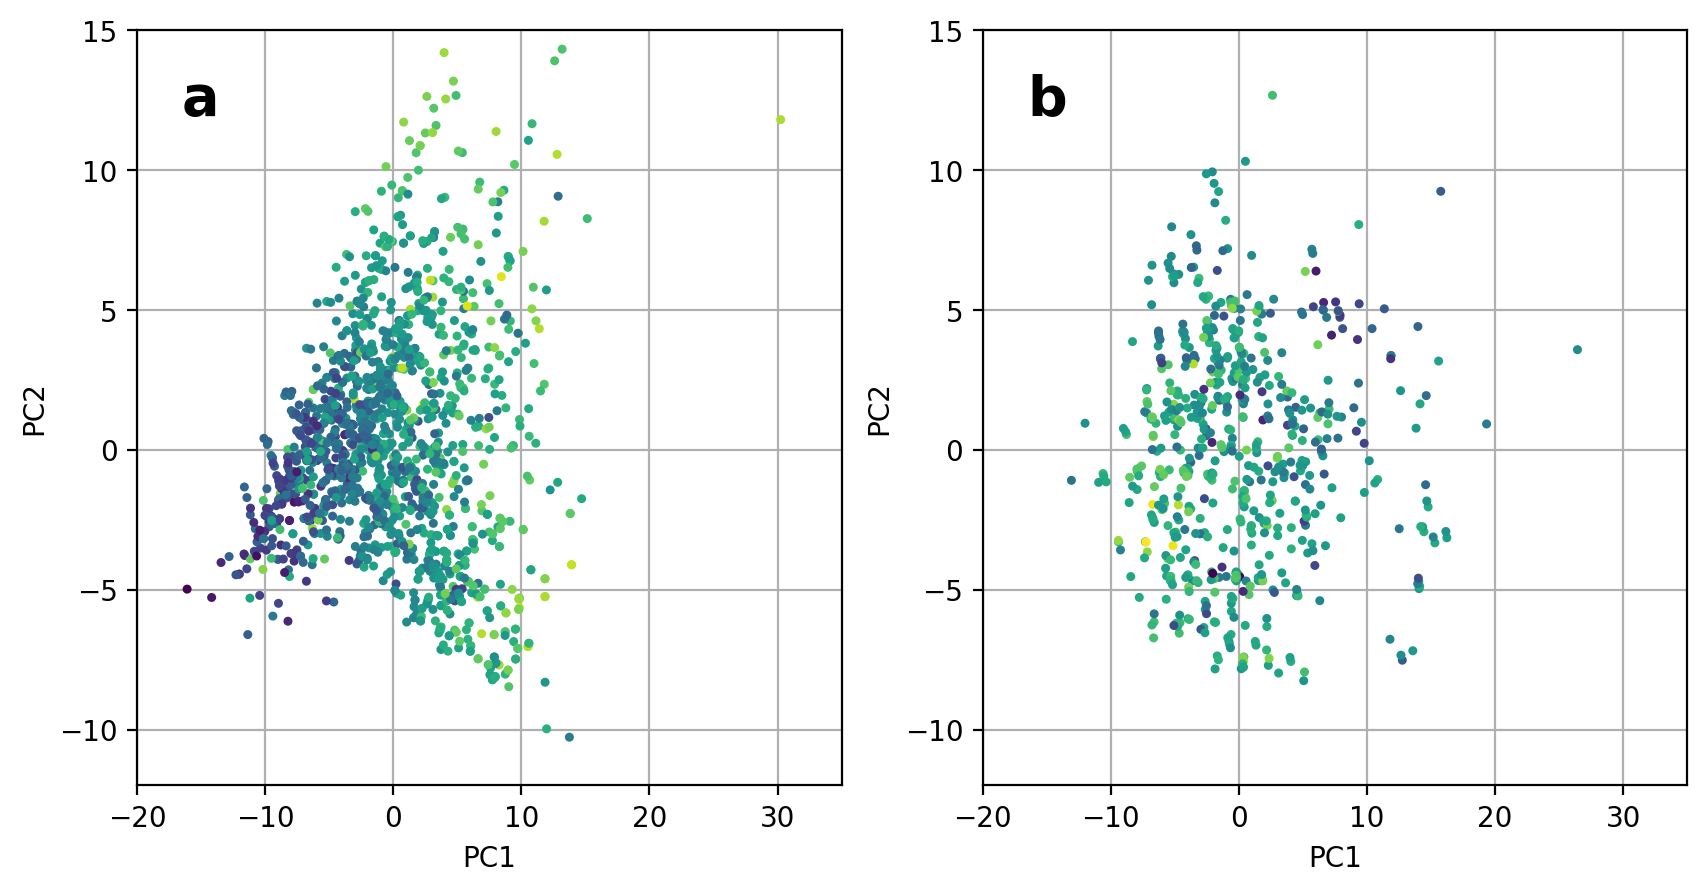

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

color_dataset('tetrahymena', 'rdkit', ax1, text_loc=[-16.5, 12], xlim=[-20, 35], ylim=[-12, 15], axlabels=['PC1', 'PC2'])
color_dataset('IL4', 'rdkit', ax2, text='b', text_loc=[-16.5, 12], xlim=[-20, 35], ylim=[-12, 15], axlabels=['PC1', 'PC2'])

plt.savefig(f'{PLOT_FOLDER}tetrahymena_IL4_rdkit_pca.pdf', bbox_inches='tight', pad_inches=0.05)
plt.show()

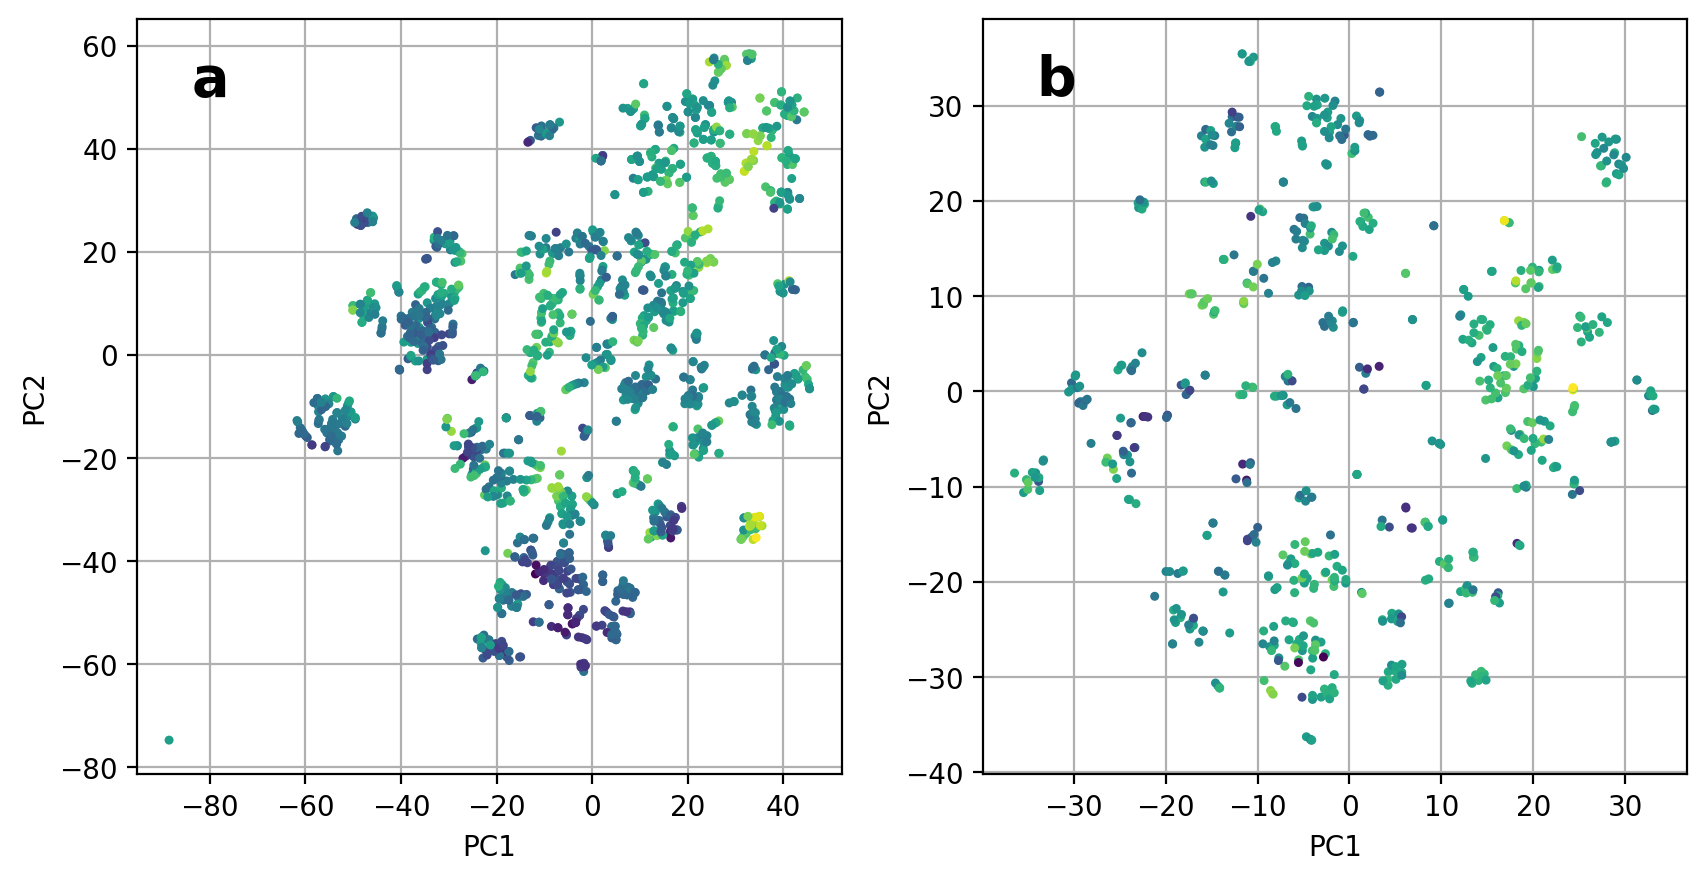

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

color_dataset('tetrahymena', 'rdkit', ax1, reduction=custom_tsne, text='', axlabels=['PC1', 'PC2'])
color_dataset('IL4', 'rdkit', ax2, reduction=custom_tsne, text='', axlabels=['PC1', 'PC2'])

xdiff1 = ax1.get_xlim()[1] - ax1.get_xlim()[0]
ydiff1 = ax1.get_ylim()[1] - ax1.get_ylim()[0]
xtext1 = ax1.get_xlim()[0] + xdiff1 / 13
ytext1 = ax1.get_ylim()[1] - ydiff1 / 10
ax1.text(xtext1, ytext1, 'a', fontsize=20, weight='bold')

xdiff2 = ax2.get_xlim()[1] - ax2.get_xlim()[0]
ydiff2 = ax2.get_ylim()[1] - ax2.get_ylim()[0]
xtext2 = ax2.get_xlim()[0] + xdiff2 / 13
ytext2 = ax2.get_ylim()[1] - ydiff2 / 10
ax2.text(xtext2, ytext2, 'b', fontsize=20, weight='bold')

plt.savefig(f'{PLOT_FOLDER}tetrahymena_IL4_rdkit_tsne.pdf', bbox_inches='tight', pad_inches=0.05)
plt.show()

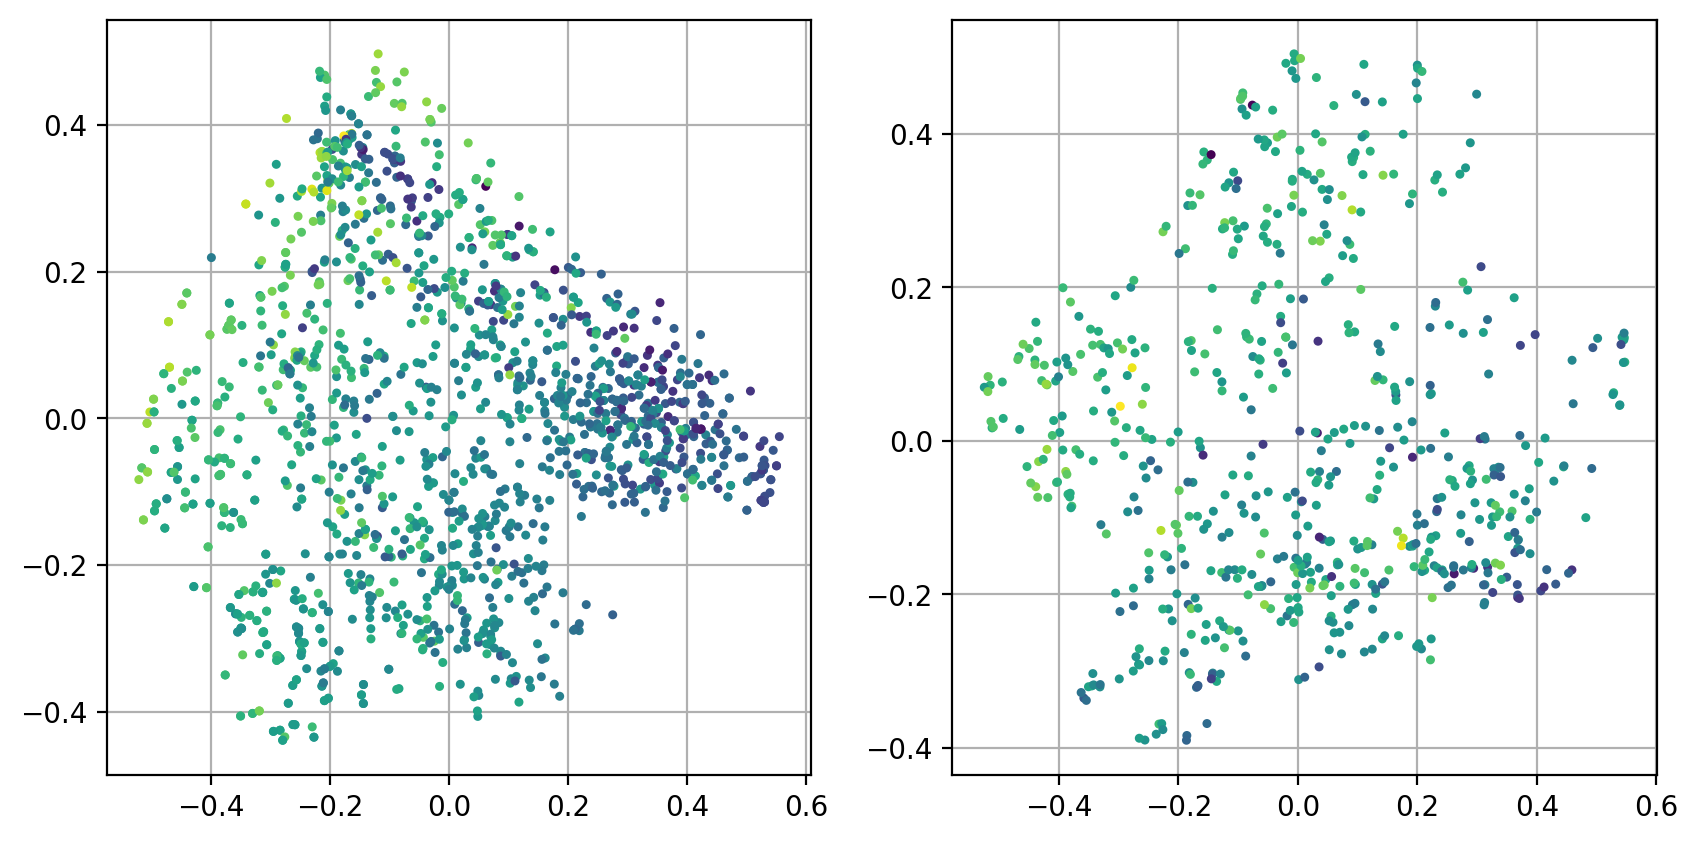

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

color_dataset('tetrahymena', 'rdkit', ax1, reduction=custom_kernel_pca, text='', text_loc=[-16.5, 12])
color_dataset('IL4', 'rdkit', ax2, reduction=custom_kernel_pca, text='', text_loc=[-16.5, 12])

plt.savefig(f'{PLOT_FOLDER}tetrahymena_IL4_rdkit_kernelpca.pdf', bbox_inches='tight', pad_inches=0.05)
plt.show()